# EDA on CDC COVID-19 Self-Test Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/cdc/U.S._COVID-19_Self-Test_Data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514469 entries, 0 to 514468
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         514469 non-null  object 
 1   state        514469 non-null  object 
 2   state_name   513539 non-null  object 
 3   state_fips   513539 non-null  float64
 4   fema_region  514469 non-null  object 
 5   age_group    514469 non-null  object 
 6   race         514469 non-null  object 
 7   ethnicity    514469 non-null  object 
 8   sex          514469 non-null  object 
 9   test_result  514469 non-null  object 
 10  total_tests  514469 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 43.2+ MB


In [33]:
df.head()

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
0,05/01/2022 12:00:00 AM,HI,Hawaii,15.0,Region 9,50-64 Years,Missing,Non-Hispanic,Male,Negative,14
1,05/08/2022 12:00:00 AM,MA,Massachusetts,25.0,Region 1,30-39 Years,Missing,Non-Hispanic,Female,Negative,36
2,05/08/2022 12:00:00 AM,CO,Colorado,8.0,Region 8,40-49 Years,Missing,Non-Hispanic,Female,Positive,31
3,05/08/2022 12:00:00 AM,OR,Oregon,41.0,Region 10,65-74 Years,Missing,Missing,Male,Negative,5
4,05/08/2022 12:00:00 AM,UT,Utah,49.0,Region 8,5-11 Years,Missing,Non-Hispanic,Female,Positive,4


In [36]:
df.isna().sum()

date             0
state            0
state_name     930
state_fips     930
fema_region      0
age_group        0
race             0
ethnicity        0
sex              0
test_result      0
total_tests      0
dtype: int64

#### Checking which columns had 'Missing' as an option and how many 'Missing' there were.

In [15]:
df[df['state'] == 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests


In [16]:
df[df['state_name'] == 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests


In [17]:
df[df['state_fips'] == 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests


In [18]:
df[df['fema_region'] == 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests


In [20]:
df[df['age_group'] == 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests


In [22]:
df[df['race'] != 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
37,06/19/2022 12:00:00 AM,NC,North Carolina,37.0,Region 4,18-29 Years,White,Non-Hispanic,Female,Negative,49
39,06/19/2022 12:00:00 AM,NC,North Carolina,37.0,Region 4,40-49 Years,Black,Non-Hispanic,Female,Negative,10
47,06/26/2022 12:00:00 AM,CA,California,6.0,Region 9,40-49 Years,White,Non-Hispanic,Male,Negative,79
70,07/10/2022 12:00:00 AM,NC,North Carolina,37.0,Region 4,18-29 Years,Black,Non-Hispanic,Female,Inconclusive,1
88,07/31/2022 12:00:00 AM,PA,Pennsylvania,42.0,Region 3,30-39 Years,White,Non-Hispanic,Female,Negative,139
...,...,...,...,...,...,...,...,...,...,...,...
514463,03/06/2022 12:00:00 AM,FL,Florida,12.0,Region 4,30-39 Years,More than one race or other race,Hispanic,Male,Positive,1
514464,01/02/2022 12:00:00 AM,TN,Tennessee,47.0,Region 4,50-64 Years,Black,Missing,Male,Negative,1
514465,01/08/2023 12:00:00 AM,OH,Ohio,39.0,Region 5,50-64 Years,White,Hispanic,Female,Negative,1
514466,10/23/2022 12:00:00 AM,MN,Minnesota,27.0,Region 5,5-11 Years,American Indian or Alaska Native,Non-Hispanic,Male,Negative,1


In [23]:
df[df['race'] == 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
0,05/01/2022 12:00:00 AM,HI,Hawaii,15.0,Region 9,50-64 Years,Missing,Non-Hispanic,Male,Negative,14
1,05/08/2022 12:00:00 AM,MA,Massachusetts,25.0,Region 1,30-39 Years,Missing,Non-Hispanic,Female,Negative,36
2,05/08/2022 12:00:00 AM,CO,Colorado,8.0,Region 8,40-49 Years,Missing,Non-Hispanic,Female,Positive,31
3,05/08/2022 12:00:00 AM,OR,Oregon,41.0,Region 10,65-74 Years,Missing,Missing,Male,Negative,5
4,05/08/2022 12:00:00 AM,UT,Utah,49.0,Region 8,5-11 Years,Missing,Non-Hispanic,Female,Positive,4
...,...,...,...,...,...,...,...,...,...,...,...
514430,04/17/2022 12:00:00 AM,KY,Kentucky,21.0,Region 4,2-4 Years,Missing,Missing,Male,Negative,1
514431,10/02/2022 12:00:00 AM,ME,Maine,23.0,Region 1,12-15 Years,Missing,Missing,Missing,Inconclusive,1
514432,12/18/2022 12:00:00 AM,AZ,Arizona,4.0,Region 9,12-15 Years,Missing,Missing,Missing,Positive,1
514447,10/02/2022 12:00:00 AM,IL,Illinois,17.0,Region 5,12-15 Years,Missing,Hispanic,Male,Negative,1


In [24]:
df[df['ethnicity'] == 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
3,05/08/2022 12:00:00 AM,OR,Oregon,41.0,Region 10,65-74 Years,Missing,Missing,Male,Negative,5
5,05/08/2022 12:00:00 AM,IL,Illinois,17.0,Region 5,30-39 Years,Missing,Missing,Male,Negative,19
6,05/15/2022 12:00:00 AM,CA,California,6.0,Region 9,30-39 Years,Missing,Missing,Female,Positive,16
8,05/15/2022 12:00:00 AM,NJ,New Jersey,34.0,Region 2,18-29 Years,Missing,Missing,Male,Negative,12
15,05/29/2022 12:00:00 AM,OH,Ohio,39.0,Region 5,65-74 Years,Missing,Missing,Female,Negative,2
...,...,...,...,...,...,...,...,...,...,...,...
514432,12/18/2022 12:00:00 AM,AZ,Arizona,4.0,Region 9,12-15 Years,Missing,Missing,Missing,Positive,1
514454,09/04/2022 12:00:00 AM,NY,New York,36.0,Region 2,40-49 Years,Black,Missing,Female,Negative,1
514460,05/22/2022 12:00:00 AM,MO,Missouri,29.0,Region 7,18-29 Years,Black,Missing,Female,Negative,1
514464,01/02/2022 12:00:00 AM,TN,Tennessee,47.0,Region 4,50-64 Years,Black,Missing,Male,Negative,1


In [25]:
df[df['ethnicity'] != 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
0,05/01/2022 12:00:00 AM,HI,Hawaii,15.0,Region 9,50-64 Years,Missing,Non-Hispanic,Male,Negative,14
1,05/08/2022 12:00:00 AM,MA,Massachusetts,25.0,Region 1,30-39 Years,Missing,Non-Hispanic,Female,Negative,36
2,05/08/2022 12:00:00 AM,CO,Colorado,8.0,Region 8,40-49 Years,Missing,Non-Hispanic,Female,Positive,31
4,05/08/2022 12:00:00 AM,UT,Utah,49.0,Region 8,5-11 Years,Missing,Non-Hispanic,Female,Positive,4
7,05/15/2022 12:00:00 AM,CA,California,6.0,Region 9,65-74 Years,Missing,Non-Hispanic,Female,Positive,76
...,...,...,...,...,...,...,...,...,...,...,...
514462,09/18/2022 12:00:00 AM,MD,Maryland,24.0,Region 3,75+ Years,Black,Non-Hispanic,Male,Negative,1
514463,03/06/2022 12:00:00 AM,FL,Florida,12.0,Region 4,30-39 Years,More than one race or other race,Hispanic,Male,Positive,1
514465,01/08/2023 12:00:00 AM,OH,Ohio,39.0,Region 5,50-64 Years,White,Hispanic,Female,Negative,1
514466,10/23/2022 12:00:00 AM,MN,Minnesota,27.0,Region 5,5-11 Years,American Indian or Alaska Native,Non-Hispanic,Male,Negative,1


In [26]:
df[df['sex'] == 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
23,06/05/2022 12:00:00 AM,MA,Massachusetts,25.0,Region 1,40-49 Years,Missing,Missing,Missing,Negative,756
28,06/12/2022 12:00:00 AM,MN,Minnesota,27.0,Region 5,12-15 Years,Missing,Missing,Missing,Positive,85
30,06/12/2022 12:00:00 AM,DE,Delaware,10.0,Region 3,30-39 Years,Missing,Missing,Missing,Positive,2
31,06/12/2022 12:00:00 AM,SC,South Carolina,45.0,Region 4,50-64 Years,Missing,Missing,Missing,Inconclusive,2
32,06/19/2022 12:00:00 AM,NJ,New Jersey,34.0,Region 2,65-74 Years,Missing,Missing,Missing,Negative,144
...,...,...,...,...,...,...,...,...,...,...,...
514431,10/02/2022 12:00:00 AM,ME,Maine,23.0,Region 1,12-15 Years,Missing,Missing,Missing,Inconclusive,1
514432,12/18/2022 12:00:00 AM,AZ,Arizona,4.0,Region 9,12-15 Years,Missing,Missing,Missing,Positive,1
514437,09/25/2022 12:00:00 AM,MN,Minnesota,27.0,Region 5,18-29 Years,Black,Non-Hispanic,Missing,Negative,1
514446,02/13/2022 12:00:00 AM,OH,Ohio,39.0,Region 5,16-17 Years,White,Non-Hispanic,Missing,Negative,1


In [27]:
df[df['sex'] != 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
0,05/01/2022 12:00:00 AM,HI,Hawaii,15.0,Region 9,50-64 Years,Missing,Non-Hispanic,Male,Negative,14
1,05/08/2022 12:00:00 AM,MA,Massachusetts,25.0,Region 1,30-39 Years,Missing,Non-Hispanic,Female,Negative,36
2,05/08/2022 12:00:00 AM,CO,Colorado,8.0,Region 8,40-49 Years,Missing,Non-Hispanic,Female,Positive,31
3,05/08/2022 12:00:00 AM,OR,Oregon,41.0,Region 10,65-74 Years,Missing,Missing,Male,Negative,5
4,05/08/2022 12:00:00 AM,UT,Utah,49.0,Region 8,5-11 Years,Missing,Non-Hispanic,Female,Positive,4
...,...,...,...,...,...,...,...,...,...,...,...
514464,01/02/2022 12:00:00 AM,TN,Tennessee,47.0,Region 4,50-64 Years,Black,Missing,Male,Negative,1
514465,01/08/2023 12:00:00 AM,OH,Ohio,39.0,Region 5,50-64 Years,White,Hispanic,Female,Negative,1
514466,10/23/2022 12:00:00 AM,MN,Minnesota,27.0,Region 5,5-11 Years,American Indian or Alaska Native,Non-Hispanic,Male,Negative,1
514467,11/27/2022 12:00:00 AM,TX,Texas,48.0,Region 6,50-64 Years,Asian,Non-Hispanic,Female,Positive,1


In [28]:
df[df['test_result'] == 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests


In [29]:
df[df['total_tests'] == 'Missing']

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests


In [34]:
df.head()

,date,state,state_name,state_fips,fema_region,age_group,race,ethnicity,sex,test_result,total_tests
0,05/01/2022 12:00:00 AM,HI,Hawaii,15.0,Region 9,50-64 Years,Missing,Non-Hispanic,Male,Negative,14
1,05/08/2022 12:00:00 AM,MA,Massachusetts,25.0,Region 1,30-39 Years,Missing,Non-Hispanic,Female,Negative,36
2,05/08/2022 12:00:00 AM,CO,Colorado,8.0,Region 8,40-49 Years,Missing,Non-Hispanic,Female,Positive,31
3,05/08/2022 12:00:00 AM,OR,Oregon,41.0,Region 10,65-74 Years,Missing,Missing,Male,Negative,5
4,05/08/2022 12:00:00 AM,UT,Utah,49.0,Region 8,5-11 Years,Missing,Non-Hispanic,Female,Positive,4


#### Checking total counts of various features to see which groups have the most and least people reporting

In [50]:
df['state'].value_counts().head()

CA    31884
TX    22226
FL    21565
IL    20458
NY    18830
Name: state, dtype: int64

In [52]:
df['state'].value_counts(ascending=True).head()

VI          355
GU          357
UNKNOWN     930
SD         2365
ND         2390
Name: state, dtype: int64

> California has the most reporting, North Dakota has the least.

In [53]:
df['age_group'].value_counts()

18-29 Years    92279
30-39 Years    82474
50-64 Years    76763
40-49 Years    73886
65-74 Years    48010
5-11 Years     37124
12-15 Years    31582
75+ Years      30551
16-17 Years    25266
2-4 Years      16534
Name: age_group, dtype: int64

> It seems like the younger group of adults is most likely to report results, with the 65-74 group (those with a higher risk) are somewhere in the middle, and the oldest (75+) and teenages among the least reporting.

In [54]:
df['race'].value_counts()

Missing                                      250948
White                                        130418
Black                                         48384
More than one race or other race              37685
Asian                                         32871
American Indian or Alaska Native               8920
Native Hawaiian or Other Pacific Islander      5243
Name: race, dtype: int64

> This is telling me that either "white" is the largest group, or that the majority of people don't want to self-identify when recording results.

In [55]:
df['ethnicity'].value_counts()

Non-Hispanic    229929
Missing         189284
Hispanic         95256
Name: ethnicity, dtype: int64

> Similar thoughts with these numbers. The majority of people don't want to self-identify.

In [56]:
df['sex'].value_counts()

Female     217136
Male       201121
Missing     96212
Name: sex, dtype: int64

> Here it's a pretty even breakdown. Most people are willing to select sex.

In [58]:
df['test_result'].value_counts()

Negative        316873
Positive        159642
Inconclusive     37954
Name: test_result, dtype: int64

> Most people are more willing to report negative results instead of the positive ones. This could be because people are afraid of where that positive result is going and who will know. 

#### Checking certain groups

In [76]:
df.groupby(['age_group','sex'])['test_result'].count()

age_group    sex    
12-15 Years  Female     12165
             Male       12241
             Missing     7176
16-17 Years  Female     10239
             Male        8893
             Missing     6134
18-29 Years  Female     41284
             Male       35543
             Missing    15452
2-4 Years    Female      5648
             Male        5556
             Missing     5330
30-39 Years  Female     36208
             Male       33460
             Missing    12806
40-49 Years  Female     32835
             Male       29921
             Missing    11130
5-11 Years   Female     14708
             Male       14672
             Missing     7744
50-64 Years  Female     33678
             Male       31696
             Missing    11389
65-74 Years  Female     20178
             Male       18749
             Missing     9083
75+ Years    Female     10193
             Male       10390
             Missing     9968
Name: test_result, dtype: int64

In [77]:
df.groupby(['ethnicity','sex'])['test_result'].count()

ethnicity     sex    
Hispanic      Female      49137
              Male        43209
              Missing      2910
Missing       Female      53727
              Male        52570
              Missing     82987
Non-Hispanic  Female     114272
              Male       105342
              Missing     10315
Name: test_result, dtype: int64

In [78]:
df.groupby(['race','sex'])['test_result'].count()

race                                       sex    
American Indian or Alaska Native           Female      4734
                                           Male        3969
                                           Missing      217
Asian                                      Female     16156
                                           Male       16025
                                           Missing      690
Black                                      Female     25821
                                           Male       21669
                                           Missing      894
Missing                                    Female     83774
                                           Male       79169
                                           Missing    88005
More than one race or other race           Female     19179
                                           Male       17065
                                           Missing     1441
Native Hawaiian or Other Pacific Islander  Female

In [79]:
df.groupby(['ethnicity','test_result'])['test_result'].count()

ethnicity     test_result 
Hispanic      Inconclusive      1665
              Negative         65165
              Positive         28426
Missing       Inconclusive     30203
              Negative        103590
              Positive         55491
Non-Hispanic  Inconclusive      6086
              Negative        148118
              Positive         75725
Name: test_result, dtype: int64

In [80]:
df.groupby(['age_group','test_result'])['test_result'].count()

age_group    test_result 
12-15 Years  Inconclusive     2414
             Negative        20491
             Positive         8677
16-17 Years  Inconclusive     2007
             Negative        16513
             Positive         6746
18-29 Years  Inconclusive     6686
             Negative        55335
             Positive        30258
2-4 Years    Inconclusive     1523
             Negative        10840
             Positive         4171
30-39 Years  Inconclusive     5631
             Negative        49685
             Positive        27158
40-49 Years  Inconclusive     4689
             Negative        45689
             Positive        23508
5-11 Years   Inconclusive     2794
             Negative        24000
             Positive        10330
50-64 Years  Inconclusive     4977
             Negative        47691
             Positive        24095
65-74 Years  Inconclusive     3122
             Negative        29801
             Positive        15087
75+ Years    Inconclusive    

In [81]:
df.groupby(['race','test_result'])['test_result'].count()

race                                       test_result 
American Indian or Alaska Native           Inconclusive       133
                                           Negative          7085
                                           Positive          1702
Asian                                      Inconclusive       619
                                           Negative         24853
                                           Positive          7399
Black                                      Inconclusive      1270
                                           Negative         35257
                                           Positive         11857
Missing                                    Inconclusive     29950
                                           Negative        131495
                                           Positive         89503
More than one race or other race           Inconclusive       720
                                           Negative         28532
                    

In [82]:
df.groupby(['sex','test_result'])['test_result'].count()

sex      test_result 
Female   Inconclusive      9453
         Negative        140132
         Positive         67551
Male     Inconclusive      7906
         Negative        131128
         Positive         62087
Missing  Inconclusive     20595
         Negative         45613
         Positive         30004
Name: test_result, dtype: int64

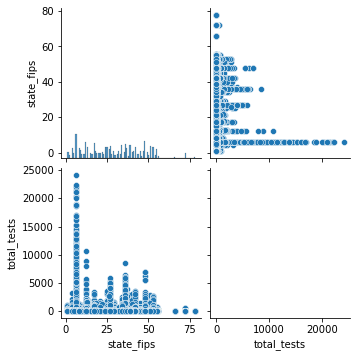

In [86]:
sns.pairplot(df)